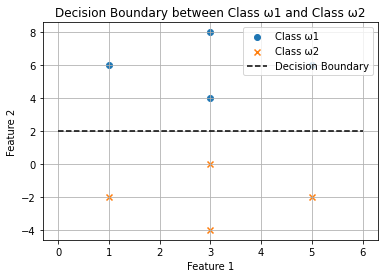

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Define the data points for ω1 and ω2
w1 = np.array([[1, 6], [3, 4], [3, 8], [5, 6]])
w2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])

# Create labels for the two classes (1 for ω1 and -1 for ω2)
labels = np.concatenate([np.ones(w1.shape[0]), -np.ones(w2.shape[0])])

# Concatenate the data points
data = np.concatenate([w1, w2])

# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# Fit the classifier to the data
clf.fit(data, labels)

# Get the coefficients of the decision boundary
w = clf.coef_[0]
b = clf.intercept_[0]

# Calculate the slope and intercept of the decision boundary
slope = -w[0] / w[1]
intercept = -b / w[1]

# Generate x values for the decision boundary
x_decision_boundary = np.linspace(0, 6, 100)

# Calculate corresponding y values for the decision boundary
y_decision_boundary = slope * x_decision_boundary + intercept

# Plot the data points
plt.scatter(w1[:, 0], w1[:, 1], label='Class ω1', marker='o')
plt.scatter(w2[:, 0], w2[:, 1], label='Class ω2', marker='x')

# Plot the decision boundary
plt.plot(x_decision_boundary, y_decision_boundary, label='Decision Boundary', color='k', linestyle='--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary between Class ω1 and Class ω2')
plt.grid(True)
plt.show()


In [10]:
import numpy as np

def corr_coef(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x) ** 2) * np.sum((y - mean_y) ** 2))
    corr = numerator / denominator
    return corr

def cov_matrix(data):
    num_samples, num_features = data.shape
    corr_matrix = np.empty((num_features, num_features), dtype=float)
    
    for i in range(num_features):
        for j in range(num_features):
            corr_matrix[i, j] = corr_coef(data[:, i], data[:, j])

    # Calculate the standard deviations of the variables
    std_devs = np.std(data, axis=0)

    # Calculate the covariance matrix
    covariance_matrix = corr_matrix * np.outer(std_devs, std_devs)
    
    return covariance_matrix


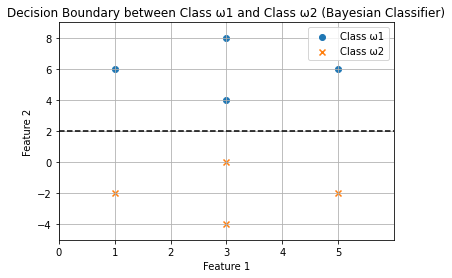

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# Define the data points for ω1 and ω2
omega1 = np.array([[1, 6], [3, 4], [3, 8], [5, 6]])
omega2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])


# Calculate the mean and covariance matrices for each class
mean_omega1 = np.mean(omega1, axis=0)
mean_omega2 = np.mean(omega2, axis=0)
cov_omega1 = cov_matrix(omega1)
cov_omega2 = cov_matrix(omega2)

# Calculate the shared covariance matrix (assuming equal covariance matrices for both classes)
shared_cov = (cov_omega1 + cov_omega2) / 2

# Define the prior probabilities (assuming equal priors)
P_omega1 = P_omega2 = 0.5

# Calculate the decision boundary coefficients
A = np.linalg.inv(shared_cov)
w = np.dot(mean_omega1 - mean_omega2, A)
b = (
    -0.5 * np.dot(mean_omega1, np.dot(np.linalg.inv(shared_cov), mean_omega1)) +
    0.5 * np.dot(mean_omega2, np.dot(np.linalg.inv(shared_cov), mean_omega2)) +
    np.log(P_omega1 / P_omega2)
)

# Generate a grid of points for plotting
x_min, x_max = min(min(omega1[:, 0]), min(omega2[:, 0])) - 1, max(max(omega1[:, 0]), max(omega2[:, 0])) + 1
y_min, y_max = min(min(omega1[:, 1]), min(omega2[:, 1])) - 1, max(max(omega1[:, 1]), max(omega2[:, 1])) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Calculate the decision boundary values for the grid points
z = np.dot(grid_points, w) + b
z = z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, z, levels=[0], colors='k', linestyles=['--'])
plt.scatter(omega1[:, 0], omega1[:, 1], label='Class ω1', marker='o')
plt.scatter(omega2[:, 0], omega2[:, 1], label='Class ω2', marker='x')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary between Class ω1 and Class ω2 (Bayesian Classifier)')
plt.grid(True)
plt.show()


C:\Users\LakshmiSrinivas\AppData\Local\Temp\ipykernel_24188\4047489219.py:39: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, z, levels=[0], colors='k', linestyles=['--'])


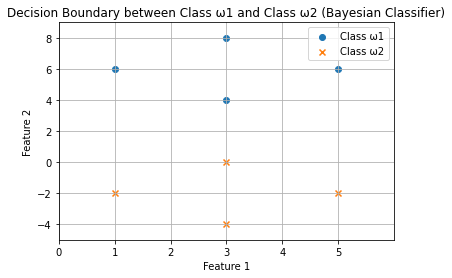

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points for ω1 and ω2
omega1 = np.array([[1, 6], [3, 4], [3, 8], [5, 6]])
omega2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])

# Calculate the mean vectors for ω1 and ω2
mean_omega1 = np.mean(omega1, axis=0)
mean_omega2 = np.mean(omega2, axis=0)

# Calculate the covariance matrices for ω1 and ω2
cov_omega1 = np.cov(omega1, rowvar=False)
cov_omega2 = np.cov(omega2, rowvar=False)

# Calculate the inverses of the covariance matrices
cov_inv_omega1 = np.linalg.inv(cov_omega1)
cov_inv_omega2 = np.linalg.inv(cov_omega2)

# Calculate the decision boundary coefficients
w = np.dot(mean_omega1 - mean_omega2, cov_inv_omega1 - cov_inv_omega2)
b = (
    -0.5 * np.dot(mean_omega1, np.dot(cov_inv_omega1, mean_omega1)) +
    0.5 * np.dot(mean_omega2, np.dot(cov_inv_omega2, mean_omega2))
    + np.log(np.linalg.det(cov_omega1) / np.linalg.det(cov_omega2))
)

# Generate a grid of points for plotting
x_min, x_max = min(np.min(omega1[:, 0]), np.min(omega2[:, 0])) - 1, max(np.max(omega1[:, 0]), np.max(omega2[:, 0])) + 1
y_min, y_max = min(np.min(omega1[:, 1]), np.min(omega2[:, 1])) - 1, max(np.max(omega1[:, 1]), np.max(omega2[:, 1])) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Calculate the decision boundary values for the grid points
z = np.dot(grid_points, w) + b
z = z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, z, levels=[0], colors='k', linestyles=['--'])

# Plot the data points
plt.scatter(omega1[:, 0], omega1[:, 1], label='Class ω1', marker='o')
plt.scatter(omega2[:, 0], omega2[:, 1], label='Class ω2', marker='x')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary between Class ω1 and Class ω2 (Bayesian Classifier)')
plt.grid(True)
plt.show()


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# importing the dataset
df = pd.read_csv("iris.csv")
df = df.drop(["Id"],axis=1)
df_train=pd.DataFrame()
df_test=pd.DataFrame()
for i in df['Species'].unique():
    df_train = pd.concat([df_train, df[df['Species'] == i].iloc[:40]],ignore_index=True)
    df_test = pd.concat([df_test, df[df['Species'] == i].iloc[40:]],ignore_index=True)
df=np.array(df)
y_train=df_train["Species"]
X_train=df_train.drop(["Species"],axis=1)
y_test=df_test["Species"]
X_test=df_test.drop(["Species"],axis=1)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate the mean and variance for each feature in each class
classes = np.unique(y_train)
mean = {}
var = {}
prior = {}

for c in classes:
    X_c = X_train[y_train == c]
    mean[c] = np.mean(X_c, axis=0)
    var[c] = np.var(X_c, axis=0)
    prior[c] = len(X_c) / len(X_train)

# Define the predict function
def predict(X):
    predictions = []

    for x in X:
        posteriors = []

        for c in classes:
            prior_prob = np.log(prior[c])
            likelihood_prob = np.sum(np.log(pdf(c, x)))
            posterior_prob = prior_prob + likelihood_prob
            posteriors.append(posterior_prob)

        predictions.append(classes[np.argmax(posteriors)])

    return np.array(predictions)

# Define the probability density function (PDF)
def pdf(class_label, x):
    mean_c = mean[class_label]
    var_c = var[class_label]
    num = np.exp(-(x - mean_c) ** 2 / (2 * var_c))
    den = np.sqrt(2 * np.pi * var_c)
    return num / den

# Make predictions on the test set
y_pred = predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
x_min, x_max = df[:,0].min() - 1, df[:,0].max() + 1
y_min, y_max = df[:,1].min() - 1, df[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df[:,0], df[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundary for Iris Dataset (Bayes Classifier)')
plt.show()


Accuracy: 100.00%


ValueError: operands could not be broadcast together with shapes (2,) (4,) 

In [15]:
for x in df

[4.6 3.1 1.5 0.2]


In [18]:
print(classes)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

# Importing the dataset
df = pd.read_csv("iris.csv")
df = df.drop(["Id"], axis=1)

# Separate the data into training and test sets
df_train = pd.DataFrame()
df_test = pd.DataFrame()

for species in df['Species'].unique():
    df_train = pd.concat([df_train, df[df['Species'] == species].iloc[:40]], ignore_index=True)
    df_test = pd.concat([df_test, df[df['Species'] == species].iloc[40:]], ignore_index=True)

X_train = df_train.drop(["Species"], axis=1).values
y_train = df_train["Species"].values
X_test = df_test.drop(["Species"], axis=1).values
y_test = df_test["Species"].values

# Calculate the mean and variance for each feature in each class
classes = np.unique(y_train)
mean = {}
var = {}
prior = {}

for c in classes:
    X_c = X_train[y_train == c]
    mean[c] = np.mean(X_c, axis=0)
    var[c] = np.var(X_c, axis=0)
    prior[c] = len(X_c) / len(X_train)

# Define the predict function
def predict(X):
    predictions = []

    for x in X:
        posteriors = []

        for c in classes:
            prior_prob = np.log(prior[c])
            likelihood_prob = np.sum(np.log(pdf(c, x)))
            posterior_prob = prior_prob + likelihood_prob
            posteriors.append(posterior_prob)

        predictions.append(classes[np.argmax(posteriors)])

    return np.array(predictions)

# Define the probability density function (PDF)
"""def pdf(class_label, x):
    mean_c = mean[class_label]
    var_c = var[class_label]
    num = np.exp(-(x - mean_c) ** 2 / (2 * var_c))
    den = np.sqrt(2 * np.pi * var_c)
    return num / den """

# Define the probability density function (PDF)
def pdf(class_label, x):
    mean_c = mean[class_label]
    var_c = var[class_label]
    x = np.array(x)  # Convert x to a NumPy array
    num = np.exp(-np.sum((x - mean_c) ** 2 / (2 * var_c)))
    den = (2 * np.pi) ** (len(x) / 2) * np.sqrt(np.prod(var_c))
    return num / den


# Make predictions on the test set
y_pred = predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundary for Iris Dataset (Bayes Classifier)')
plt.show()


Accuracy: 100.00%


ValueError: operands could not be broadcast together with shapes (2,) (4,) 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

# Importing the dataset from the CSV file
df = pd.read_csv("iris.csv")
df = df.drop(["Id"], axis=1)

# Separate the data into training and test sets
df_train = pd.DataFrame()
df_test = pd.DataFrame()

for species in df['Species'].unique():
    df_train = pd.concat([df_train, df[df['Species'] == species].iloc[:40]], ignore_index=True)
    df_test = pd.concat([df_test, df[df['Species'] == species].iloc[40:]], ignore_index=True)

X_train = df_train.drop(["Species"], axis=1).values
y_train = df_train["Species"].values
X_test = df_test.drop(["Species"], axis=1).values
y_test = df_test["Species"].values

# Calculate the mean and variance for each feature in each class
classes = np.unique(y_train)
mean = {}
var = {}
prior = {}

for c in classes:
    X_c = X_train[y_train == c]
    mean[c] = np.mean(X_c, axis=0)
    var[c] = np.var(X_c, axis=0)
    prior[c] = len(X_c) / len(X_train)

# Define the predict function
def predict(X):
    predictions = []

    for x in X:
        posteriors = []

        for c in classes:
            prior_prob = np.log(prior[c])
            likelihood_prob = np.sum(np.log(pdf(c, x)))
            posterior_prob = prior_prob + likelihood_prob
            posteriors.append(posterior_prob)

        predictions.append(classes[np.argmax(posteriors)])

    return np.array(predictions)

# Define the probability density function (PDF)
def pdf(class_label, x):
    mean_c = mean[class_label]
    var_c = var[class_label]
    x = np.array(x)  # Convert x to a NumPy array
    num = np.exp(-np.sum((x - mean_c) ** 2 / (2 * var_c)))
    den = (2 * np.pi) ** (len(x) / 2) * np.sqrt(np.prod(var_c))
    return num / den

# Make predictions on the test set
y_pred = predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundary for Iris Dataset (Bayes Classifier)')
plt.show()


Accuracy: 100.00%


ValueError: operands could not be broadcast together with shapes (2,) (4,) 